In [205]:
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
import xgboost as xgb
import scipy
import matplotlib.pyplot as plt

In [411]:
train_data = pickle.load(open("072716_COMBINED_DATA_TRAIN.p","rb"))
nonDataCols = ['page_id','page_is_ep','article_id']
colsToExclude = ['days_since_touch','revisionslastyear','pageviews','page_len']
train_data = train_data.dropna(axis=0)
classes = train_data['page_is_ep'].to_dense()
page_ids = train_data['page_id']
train_data = train_data.drop(nonDataCols,axis=1)
train_data = train_data.drop(colsToExclude,axis=1)
features = train_data.columns

In [381]:
print(train_data.shape)
print(len(classes))

(58516, 1566)
58516


In [412]:
from sklearn.cross_validation import train_test_split

In [413]:
dataArray = scipy.sparse.csr_matrix(train_data.values)

In [414]:
X_train, X_test, y_train, y_test = train_test_split(dataArray, classes, test_size=0.2, stratify=classes)

In [415]:
dtrain = xgb.DMatrix(X_train,label=y_train,feature_names=features)
dtest  = xgb.DMatrix(X_test,label=y_test,feature_names=features)

In [344]:
param = {'bst:max_depth':5, 'bst:eta':0.1, 'silent':1, 'objective':'binary:logistic', 'eval_metric':'logloss',
         'subsample':0.5, 'bst:lambda':10, 'bst:gamma':10, 'min_child_weight':50}
evallist  = [(dtest,'eval'), (dtrain,'train')]
plst = param.items()

In [345]:
num_round = 50
bst = xgb.train(plst, dtrain, num_round, evallist)

[0]	eval-logloss:0.625030	train-logloss:0.625380
[1]	eval-logloss:0.569387	train-logloss:0.569653
[2]	eval-logloss:0.522816	train-logloss:0.523125
[3]	eval-logloss:0.483818	train-logloss:0.483903
[4]	eval-logloss:0.450582	train-logloss:0.450643
[5]	eval-logloss:0.422591	train-logloss:0.422523
[6]	eval-logloss:0.398099	train-logloss:0.398083
[7]	eval-logloss:0.376901	train-logloss:0.376965
[8]	eval-logloss:0.358782	train-logloss:0.358620
[9]	eval-logloss:0.342823	train-logloss:0.342632
[10]	eval-logloss:0.329111	train-logloss:0.328896
[11]	eval-logloss:0.317237	train-logloss:0.316952
[12]	eval-logloss:0.306908	train-logloss:0.306426
[13]	eval-logloss:0.297628	train-logloss:0.297300
[14]	eval-logloss:0.289678	train-logloss:0.289119
[15]	eval-logloss:0.282790	train-logloss:0.282017
[16]	eval-logloss:0.276647	train-logloss:0.275791
[17]	eval-logloss:0.271313	train-logloss:0.270201
[18]	eval-logloss:0.266607	train-logloss:0.265254
[19]	eval-logloss:0.262651	train-logloss:0.261075
[20]	eval-

In [ ]:
import graphviz
xgb.to_graphviz(bst, num_trees=0)

In [ ]:
xgb.plot_importance(bst)

In [351]:
from sklearn.metrics import classification_report
predicted = bst.predict(dtrain)
classes = [x > 0.35 for x in predicted]
print(classification_report(y_train,classes))

             precision    recall  f1-score   support

        0.0       0.94      0.98      0.96     42482
        1.0       0.62      0.34      0.44      4330

avg / total       0.91      0.92      0.91     46812



In [291]:


bst.dump_model("is_it_a_model.txt")

TypeError: get_fscore() got an unexpected keyword argument 'importance_type'

In [53]:
features[1533]

'pca_islam'

In [32]:
features[156]

'biggest'

In [398]:
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import ParameterGrid

param_test = [{
    'max_depth':[5,6,7]
}]



In [399]:
gridsearch1 = GridSearchCV(xgb.XGBClassifier(
    learning_rate=0.2, n_estimators=100, max_depth=5, min_child_weight=1,
    gamma=0, subsample=0.5, colsample_bytree=0.8,
    objective='binary:logistic', seed=50), param_test, scoring='log_loss', iid=False, cv=3, verbose=3, n_jobs=1)

In [379]:
train_data.shape
len(classes)

46812

In [400]:
import warnings
warnings.filterwarnings('ignore')

gridsearch1.fit(train_data.as_matrix(), classes)
print(gridsearch1.grid_scores_,gridsearch1.best_params_,gridsearch1.best_score_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] max_depth=5 .....................................................
[CV] ........................... max_depth=5, score=-0.233847 -  42.3s
[CV] max_depth=5 .....................................................
[CV] ........................... max_depth=5, score=-0.230612 -  43.0s
[CV] max_depth=5 .....................................................
[CV] ........................... max_depth=5, score=-0.225213 -  42.4s
[CV] max_depth=6 .....................................................
[CV] ........................... max_depth=6, score=-0.234565 -  49.3s
[CV] max_depth=6 .....................................................
[CV] ........................... max_depth=6, score=-0.232795 -  49.7s
[CV] max_depth=6 .....................................................
[CV] ........................... max_depth=6, score=-0.225698 -  49.0s
[CV] max_depth=7 .....................................................
[CV] .............

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  7.4min finished


[mean: -0.22989, std: 0.00356, params: {'max_depth': 5}, mean: -0.23102, std: 0.00383, params: {'max_depth': 6}, mean: -0.23196, std: 0.00249, params: {'max_depth': 7}] {'max_depth': 5} -0.229890693307


In [401]:
param_test2 = {
    'gamma':[i/10.0 for i in range(0,5)]
}

gridsearch2 = GridSearchCV(xgb.XGBClassifier(
    learning_rate=0.2, n_estimators=100, max_depth=5, min_child_weight=1,
    gamma=0, subsample=0.5, colsample_bytree=0.8,
    objective='binary:logistic', seed=50), param_test2, scoring='log_loss', iid=False, cv=3, verbose=3, n_jobs=1)

In [402]:
gridsearch2.fit(train_data.as_matrix(), classes)
print(gridsearch2.best_params_,gridsearch2.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] gamma=0.0 .......................................................
[CV] ............................. gamma=0.0, score=-0.233847 -  41.0s
[CV] gamma=0.0 .......................................................
[CV] ............................. gamma=0.0, score=-0.230612 -  41.4s
[CV] gamma=0.0 .......................................................
[CV] ............................. gamma=0.0, score=-0.225213 -  41.1s
[CV] gamma=0.1 .......................................................
[CV] ............................. gamma=0.1, score=-0.233855 -  43.0s
[CV] gamma=0.1 .......................................................
[CV] ............................. gamma=0.1, score=-0.231235 -  44.3s
[CV] gamma=0.1 .......................................................
[CV] ............................. gamma=0.1, score=-0.225826 -  44.0s
[CV] gamma=0.2 .......................................................
[CV] ............

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 11.0min finished


{'gamma': 0.0} -0.229890693307


In [405]:
param_test3 = {
    'reg_alpha':[1,3,10,30,100]
}

gridsearch3 = GridSearchCV(xgb.XGBClassifier(
    learning_rate=0.2, n_estimators=100, max_depth=5, min_child_weight=1,
    gamma=0, subsample=0.5, colsample_bytree=0.8,
    objective='binary:logistic', seed=50), param_test3, scoring='log_loss', iid=False, cv=3, verbose=3, n_jobs=1)

In [406]:
gridsearch3.fit(train_data.as_matrix(), classes)
print(gridsearch3.best_params_,gridsearch3.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] reg_alpha=1 .....................................................
[CV] ........................... reg_alpha=1, score=-0.232955 -  40.1s
[CV] reg_alpha=1 .....................................................
[CV] ........................... reg_alpha=1, score=-0.230912 -  41.7s
[CV] reg_alpha=1 .....................................................
[CV] ........................... reg_alpha=1, score=-0.226023 -  46.4s
[CV] reg_alpha=3 .....................................................
[CV] ........................... reg_alpha=3, score=-0.233500 -  40.8s
[CV] reg_alpha=3 .....................................................
[CV] ........................... reg_alpha=3, score=-0.231667 -  41.3s
[CV] reg_alpha=3 .....................................................
[CV] ........................... reg_alpha=3, score=-0.224488 -  41.3s
[CV] reg_alpha=10 ....................................................
[CV] ............

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  9.7min finished


{'reg_alpha': 3} -0.229884897266


In [409]:
param_test4 = {
    'min_child_weight':[10,30]
}

gridsearch4 = GridSearchCV(xgb.XGBClassifier(
    learning_rate=0.2, n_estimators=100, max_depth=5, min_child_weight=1,
    gamma=0, subsample=0.5, colsample_bytree=0.8, reg_alpha=3,
    objective='binary:logistic', seed=50), param_test4, scoring='log_loss', iid=False, cv=3, verbose=3, n_jobs=1)

In [410]:
gridsearch4.fit(train_data.as_matrix(), classes)
print(gridsearch4.best_params_,gridsearch4.best_score_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] min_child_weight=10 .............................................
[CV] ................... min_child_weight=10, score=-0.233447 -  41.6s
[CV] min_child_weight=10 .............................................
[CV] ................... min_child_weight=10, score=-0.231774 -  40.8s
[CV] min_child_weight=10 .............................................
[CV] ................... min_child_weight=10, score=-0.225695 -  41.3s
[CV] min_child_weight=30 .............................................
[CV] ................... min_child_weight=30, score=-0.238324 -  39.8s
[CV] min_child_weight=30 .............................................
[CV] ................... min_child_weight=30, score=-0.237202 -  40.0s
[CV] min_child_weight=30 .............................................
[CV] ................... min_child_weight=30, score=-0.229843 -  41.0s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  4.1min finished


{'min_child_weight': 10} -0.230305110909


In [416]:
param = {'bst:max_depth':5, 'bst:eta':0.1, 'silent':1, 'objective':'binary:logistic', 'eval_metric':'logloss',
         'subsample':0.5, 'bst:gamma':0, 'min_child_weight':10, 'bst:alpha':3}
evallist  = [(dtest,'eval'), (dtrain,'train')]
plst = param.items()

In [419]:
num_round = 200
opbst = xgb.train(plst, dtrain, num_round, evallist, early_stopping_rounds=20)

Will train until train error hasn't decreased in 20 rounds.
[0]	eval-logloss:0.562953	train-logloss:0.561696
[1]	eval-logloss:0.476404	train-logloss:0.474212
[2]	eval-logloss:0.414974	train-logloss:0.411977
[3]	eval-logloss:0.370679	train-logloss:0.366563
[4]	eval-logloss:0.337558	train-logloss:0.332743
[5]	eval-logloss:0.312721	train-logloss:0.307089
[6]	eval-logloss:0.293792	train-logloss:0.287439
[7]	eval-logloss:0.279422	train-logloss:0.272312
[8]	eval-logloss:0.268371	train-logloss:0.260289
[9]	eval-logloss:0.260010	train-logloss:0.251119
[10]	eval-logloss:0.253685	train-logloss:0.243930
[11]	eval-logloss:0.248806	train-logloss:0.238423
[12]	eval-logloss:0.245132	train-logloss:0.234100
[13]	eval-logloss:0.242137	train-logloss:0.230586
[14]	eval-logloss:0.239761	train-logloss:0.227793
[15]	eval-logloss:0.238029	train-logloss:0.225376
[16]	eval-logloss:0.236298	train-logloss:0.223292
[17]	eval-logloss:0.235087	train-logloss:0.221727
[18]	eval-logloss:0.233571	train-logloss:0.220208


In [482]:
opbst.save_model("OPTIMIZED_CONTENT_FEATURE_XGB_MODEL.txt")

In [423]:
feature_importance = opbst.get_fscore()

In [425]:
testSet = pickle.load(open("COMBINED_DATA_TEST.p","rb"))
nonDataCols = ['page_id','page_is_ep','article_id']
colsToExclude = ['days_since_touch','revisionslastyear','pageviews','page_len']
testSet = testSet.dropna(axis=0)
classes = testSet['page_is_ep'].to_dense()
page_ids = testSet['page_id']
testSet = testSet.drop(nonDataCols,axis=1)
testSet = testSet.drop(colsToExclude,axis=1)
testArray = scipy.sparse.csr_matrix(testSet.values)

In [427]:
testDMatrix = xgb.DMatrix(testArray, label=classes, feature_names=features)

In [429]:
testPredictions = opbst.predict(testDMatrix)

In [430]:
from sklearn.metrics import precision_recall_curve
p, r, t = precision_recall_curve(classes, testPredictions)

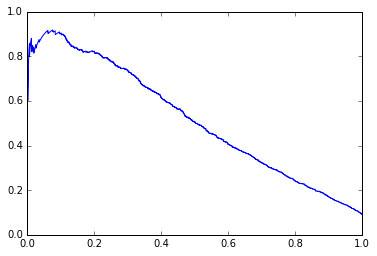

In [431]:
plt.plot(r,p)

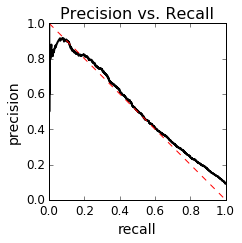

In [626]:
plt.figure(figsize=(3.5,3.5))
plt.plot(r,p,'k-',linewidth=2)
plt.plot([0,1],[1,0],'r--')
plt.xlabel('recall',size=14)
plt.ylabel('precision',size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Precision vs. Recall",size=16)
plt.subplots_adjust(left=0.2,bottom=0.2)
plt.savefig("xgb2_pr.png")
plt.show()

In [435]:
from sklearn.metrics import log_loss
log_loss(classes,testPredictions)

0.21338308876858558

In [441]:
from sklearn.metrics import roc_curve
fpr, tpr, t = roc_curve(classes, testPredictions)

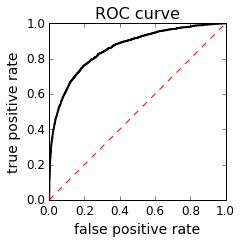

In [628]:
plt.figure(figsize=(3.5,3.5))
plt.plot(fpr, tpr, 'k-',linewidth=2)
plt.plot([0,1],[0,1],'r--')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("false positive rate",size=14)
plt.ylabel("true positive rate",size=14)
plt.title("ROC curve",size=16)
plt.subplots_adjust(left=0.2,bottom=0.2)
plt.savefig("xgb2_roc.png")
plt.show()

In [444]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(classes, testPredictions))

0.859988786703


In [450]:
from sklearn.metrics import classification_report
print(classification_report(classes, [x > 0.3 for x in testPredictions]))

             precision    recall  f1-score   support

        0.0       0.95      0.96      0.95     17732
        1.0       0.52      0.48      0.50      1767

avg / total       0.91      0.91      0.91     19499



In [452]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(classes, [x > 0.3 for x in testPredictions]))

[[16953   779]
 [  912   855]]


In [453]:
feature_importance

{'abus': 3,
 'acr': 1,
 'adolesc': 1,
 'afghan': 1,
 'aggreg': 2,
 'ali': 3,
 'alleg': 10,
 'allegedli': 2,
 'alqaeda': 1,
 'american_children': 1,
 'anxieti': 1,
 'archaic': 1,
 'architect': 1,
 'ariel': 1,
 'arkansa': 1,
 'arrog': 1,
 'assassin': 2,
 'assert': 8,
 'athlet': 6,
 'atla': 1,
 'attest': 4,
 'attitud': 4,
 'audit': 1,
 'auspic': 1,
 'austrian': 1,
 'avenu': 1,
 'awkward': 1,
 'bad': 4,
 'barack': 1,
 'batman': 2,
 'battalion': 1,
 'be': 1,
 'behaviour': 3,
 'biggest': 4,
 'billboard': 12,
 'bishop': 2,
 'blog': 2,
 'borough': 1,
 'bro': 2,
 'bronz': 2,
 'butt': 2,
 'c_21st': 9,
 'c_actors': 4,
 'c_actresses': 1,
 'c_african': 1,
 'c_albums': 8,
 'c_american': 20,
 'c_artists': 1,
 'c_award': 3,
 'c_characters': 8,
 'c_coordinates': 6,
 'c_county': 3,
 'c_descent': 5,
 'c_disputes': 4,
 'c_female': 6,
 'c_fictional': 5,
 'c_film': 3,
 'c_football': 4,
 'c_groups': 4,
 'c_india': 2,
 'c_indian': 6,
 'c_male': 8,
 'c_musicians': 3,
 'c_related': 7,
 'c_season': 3,
 'c_singer

In [454]:
featImportance = pd.DataFrame.from_dict(feature_importance, orient='index')

In [456]:
featImportance.columns = ['fscore']

In [458]:
featImportance.sort_values('fscore',ascending=False)

,fscore
ratio,153
frac_popular,101
frac_newspaper,90
pl_count,87
frac_library,67
frac_scholarly,60
frac_entertainment,52
exLink_count,49
frac_database,44
pca_lgbt,44


In [459]:
featImportance['fnorm'] = featImportance['fscore'] / sum(featImportance['fscore'])

In [462]:
featImportance.sort_values('fnorm',inplace=True,ascending=False)

In [464]:
featScores = featImportance[:20]['fnorm'].values
featLabels = featImportance[:20]['fnorm'].index

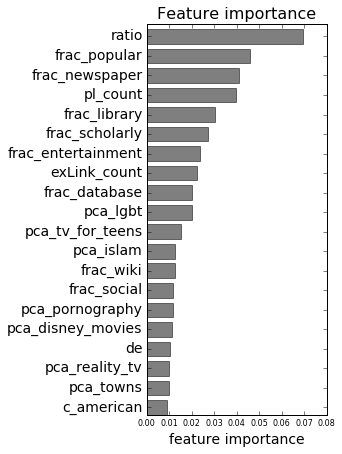

In [616]:
plt.figure(figsize=(5,7))
plt.barh(np.arange(20),list(reversed(featScores)),0.75,alpha=0.5,color='black')
plt.xlabel("feature importance", size=14)
plt.xticks(size=8)
plt.xlim([0,0.08])
plt.yticks(np.arange(20) + (0.75/2), list(reversed(featLabels)),size=14)
plt.subplots_adjust(left=0.4)
plt.title("Feature importance",size=16)
plt.savefig("xgb2_importance.png")

plt.show()

In [498]:
#predAnalysis = pd.concat([pd.Series(page_ids),pd.Series(classes),pd.Series(testPredictions)], axis=1, ignore_index=True)

In [517]:
page_id = pd.Series(list(page_ids.to_dense()))
ground_truth = pd.Series(list(classes))
model_predictions = pd.Series(list(testPredictions))

In [523]:
predAnalysis = pd.concat([page_id,ground_truth,model_predictions], axis=1, ignore_index=True)
predAnalysis.columns = ['page_id','page_is_ep','model_prediction']

In [524]:
import pymysql

# your username and password go here!
creds = {'user': 'brian', 
         'pswd': 'farley'} 


connection = pymysql.connect(host="atriskwiki.cbprs6vpqcbz.us-west-1.rds.amazonaws.com",
                            user=creds['user'],
                            password=creds['pswd'],
                            port=3306,
                            db="atriskwiki",
                            charset="utf8")

cur = connection.cursor()

In [526]:
getTitles = "SELECT page_id, page_title FROM core WHERE page_in_train = 0 AND page_batch < 99"
cur.execute(getTitles)
titles = pd.DataFrame(list(cur.fetchall()),columns=['page_id','page_title'])

In [527]:
predAnalysis = pd.merge(predAnalysis, titles, how='inner', on='page_id')

In [529]:
predAnalysis['inacc'] = predAnalysis['page_is_ep'] - predAnalysis['model_prediction']

In [533]:
predAnalysis['abs_inacc'] = predAnalysis['inacc'].abs()

In [539]:
predAnalysis[predAnalysis['page_is_ep'] == 0].sort_values('abs_inacc')

,page_id,page_is_ep,model_prediction,page_title,inacc,abs_inacc
15293,32878740.0,0.0,0.000507,2011_FIBA_Africa_Championship_for_Women,-0.000507,0.000507
17651,42222868.0,0.0,0.000618,2014_Duke_Blue_Devils_men's_soccer_team,-0.000618,0.000618
14660,30267029.0,0.0,0.000809,2011_FC_Seoul_season,-0.000809,0.000809
1285,131385.0,0.0,0.000818,"Muhlenberg_Township,_Berks_County,_Pennsylvania",-0.000818,0.000818
16985,39777657.0,0.0,0.000834,2004–05_Taça_de_Portugal,-0.000834,0.000834
19313,50119351.0,0.0,0.000948,2002_Western_Kentucky_Hilltoppers_football_team,-0.000948,0.000948
18887,47921297.0,0.0,0.000952,2015–16_IPFW_Mastodons_men's_basketball_team,-0.000952,0.000952
17649,42212755.0,0.0,0.000963,Chinese_Taipei_at_the_2014_Summer_Youth_Olympics,-0.000963,0.000963
17759,42685433.0,0.0,0.001013,2014–15_Rhode_Island_Rams_men's_basketball_team,-0.001013,0.001013
14408,28948286.0,0.0,0.001051,List_of_churches_preserved_by_the_Churches_Con...,-0.001051,0.001051


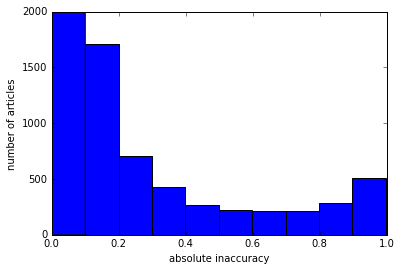

In [546]:
plt.figure()
plt.hist(predAnalysis['abs_inacc'])
plt.xlabel("absolute inaccuracy")
plt.ylabel("number of articles")
plt.ylim([0,2000])
plt.show()

In [550]:
predAnalysis[(predAnalysis['page_is_ep'] == 0) & (predAnalysis['model_prediction'] >= 0.3)]

,page_id,page_is_ep,model_prediction,page_title,inacc,abs_inacc
11,1216.0,0.0,0.730170,Athens,-0.730170,0.730170
22,2116.0,0.0,0.365962,Apple_II_series,-0.365962,0.365962
63,4800.0,0.0,0.376223,Babylon_5,-0.376223,0.376223
66,5040.0,0.0,0.510289,Inedia,-0.510289,0.510289
85,6670.0,0.0,0.404346,Cement,-0.404346,0.404346
90,7053.0,0.0,0.505494,Cannon,-0.505494,0.505494
121,10073.0,0.0,0.696548,Epicurus,-0.696548,0.696548
124,10287.0,0.0,0.313671,Hirohito,-0.313671,0.313671
126,10500.0,0.0,0.361674,Earless_seal,-0.361674,0.361674
161,12855.0,0.0,0.741465,George_Bernard_Shaw,-0.741465,0.741465


In [568]:
with open("Previously_EP_articles.txt","r") as f:
    previouslyEP = set([int(x.rstrip()) for x in f.readlines()])


TypeError: 'set' object does not support indexing

In [575]:
predAnalysis['prev_EP'] = 0

def prevEP(x):
    if int(x['page_id']) in previouslyEP:
        return 1
    else:
        return 0

predAnalysis['prev_EP'] = predAnalysis.apply(prevEP, axis=1)

In [580]:
predAnalysis[(predAnalysis['model_prediction'] >= 0.3) & (predAnalysis['page_is_ep'] == 0)]['prev_EP'].sum()

259

In [581]:
259/779

0.3324775353016688

In [583]:
predAnalysis.rename({'model_prediction':'xgb_mod2_pred'},inplace=True)

In [585]:
modelPreds = predAnalysis[['page_id','page_is_ep','page_title','prev_EP','model_prediction']]

In [587]:
modelPreds.columns = ['page_id','page_is_ep','page_title','prev_EP','xgb_model2_prediction']

In [588]:
pickle.dump(modelPreds,open("combined_model_predictions.p","wb"))

In [592]:
def GetPageTitles(listofIDs, cur=cur):
    cur.execute("SELECT page_title FROM core WHERE page_id IN ({})".format(",".join([str(x) for x in listofIDs])))
    return list(cur.fetchall())

In [593]:
GetPageTitles([25])

[('Autism',)]

In [629]:
type(testSet)

pandas.sparse.frame.SparseDataFrame

In [663]:
topFeats = testSet[list(featLabels)].copy()
topFeats = topFeats.abs()

In [652]:

np.corrcoef(topFeats['ratio'].to_dense(),predAnalysis['model_prediction'])[0,1]

0.36445305188290944

In [660]:
def GetPearson(colname):
    return np.corrcoef(topFeats[colname].to_dense(),predAnalysis['model_prediction'])[0,1]

In [664]:
pearsons = {}
for colname in list(topFeats.columns):
    pearsons[colname] = GetPearson(colname)
pdPearson = pd.Series(list(pearsons.values()),index=list(pearsons.keys()))

In [667]:
pdPearson[list(topFeats.columns)]

ratio                 0.364453
frac_popular          0.220813
frac_newspaper        0.230276
pl_count             -0.097846
frac_library         -0.027239
frac_scholarly        0.048604
frac_entertainment    0.080336
exLink_count          0.059126
frac_database        -0.092170
pca_lgbt              0.121191
pca_tv_for_teens      0.104579
pca_islam             0.102525
frac_wiki            -0.154313
frac_social           0.048444
pca_pornography       0.143815
pca_disney_movies     0.119194
de                   -0.060329
pca_reality_tv       -0.029764
pca_towns            -0.107392
c_american            0.166960
dtype: float64

In [682]:
fuckyounumpy = pd.Series(np.zeros(20))

In [687]:
pdPearsonDF = pd.DataFrame(pdPearson[list(topFeats.columns)])

In [688]:
pdPearsonDF['zeros'] = np.zeros(20)

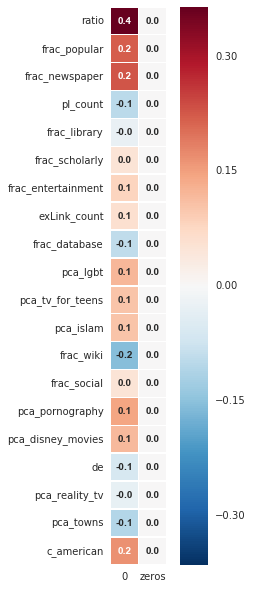

In [707]:
import seaborn as sns
fig, ax = plt.subplots(1,figsize=(5,10))
ax = sns.heatmap(pdPearsonDF,square=True,linewidths=0.5,annot=True,fmt=".1f",annot_kws={'size':10,'weight':'heavy'})
fig.savefig("heatmap.png")